In [ ]:
# first part of this notebook was completed by Yervand (my pipeline is at the bottom)
import mne

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
!ls ../NEU502/bids/derivatives/preproc/sub-502/ses-01/meg

ls: ../NEU502/bids/derivatives/preproc/sub-502/ses-01/meg: No such file or directory


In [ ]:
# change to your file location
epochs = mne.read_epochs('/Users/zachary/Desktop/Princeton/2024-25/NEU 502B/neu502b-2025/MEG Experiment/sub-502_ses-01_task-AVpilot_proc-clean_epo.fif', preload=True)

Reading /Users/zachary/Desktop/Princeton/2024-25/NEU 502B/neu502b-2025/MEG Experiment/sub-502_ses-01_task-AVpilot_proc-clean_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 6 columns
993 matching events found
No baseline correction applied
0 projection items activated


In [23]:
print(epochs)

<EpochsFIF | 993 events (all good), -0.2 – 0.6 s (baseline -0.15 – 0.05 s), ~797.4 MiB, data loaded, with metadata,
 'aud': 256
 'audvis': 480
 'vis': 257>


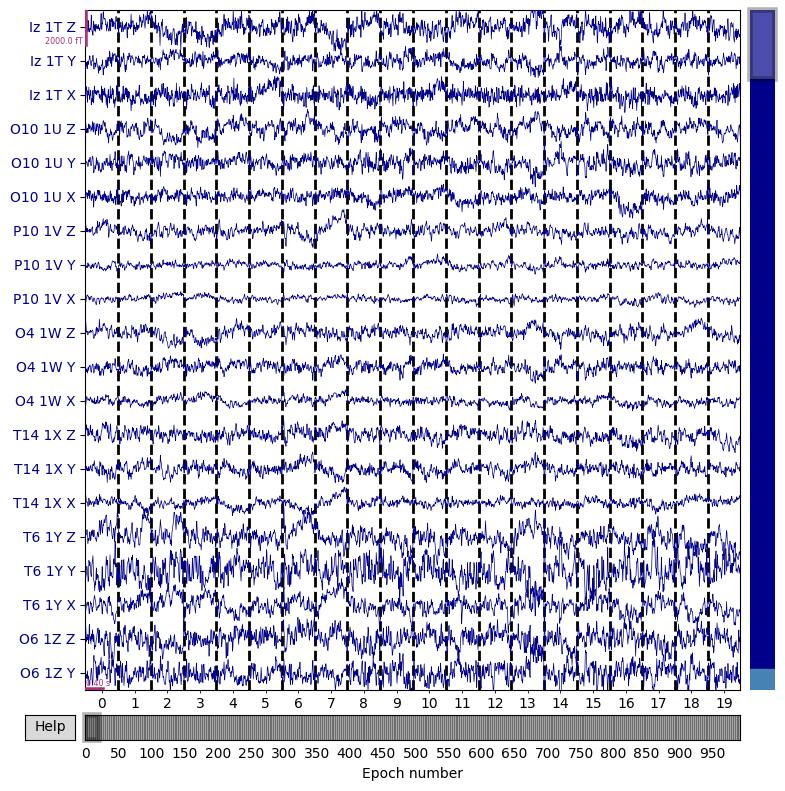

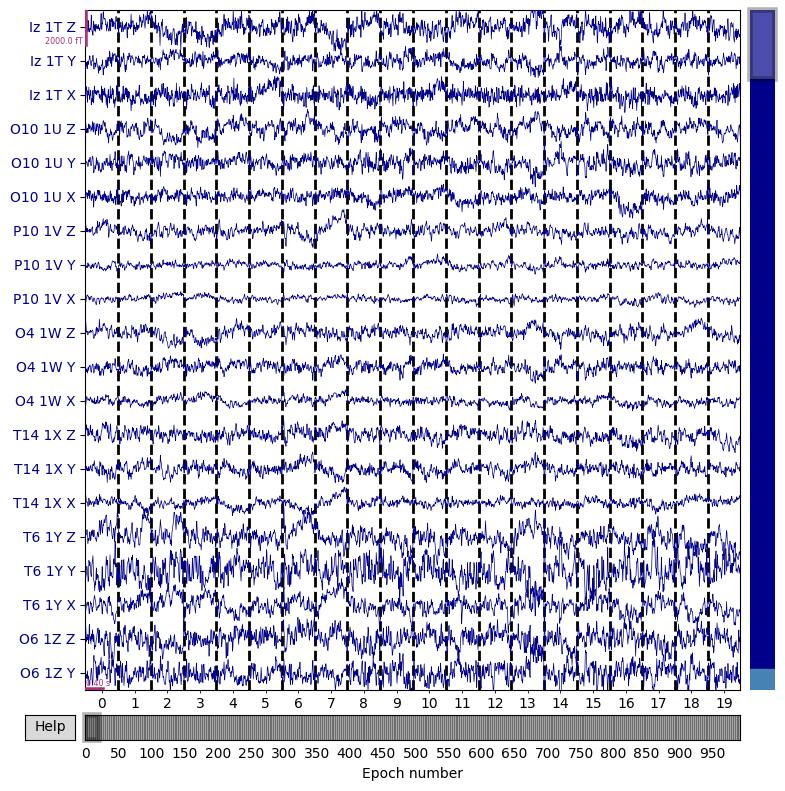

In [24]:
epochs.plot()

combining channels using RMS (mag channels)
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)


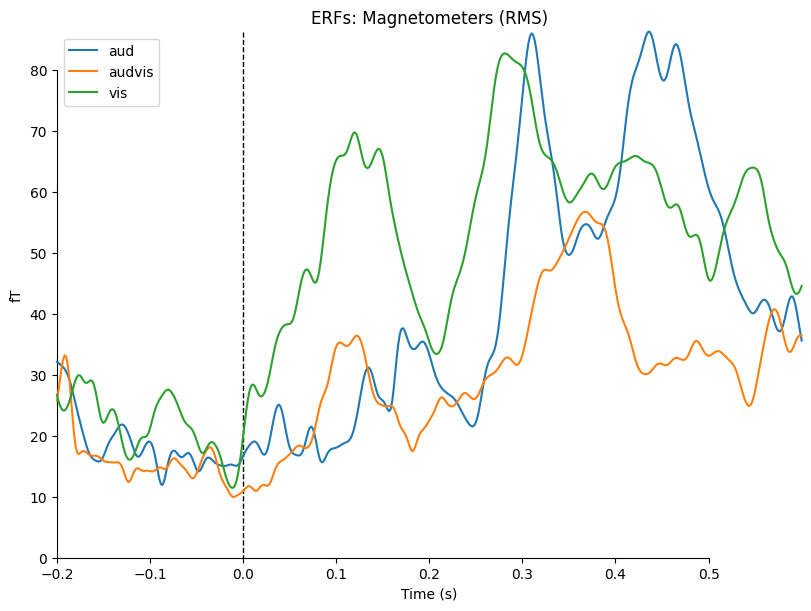

[<Figure size 800x600 with 1 Axes>]

In [25]:
# Average across epochs per condition
evokeds = {cond: epochs[cond].average() for cond in epochs.event_id}

# Plot all evoked responses together for comparison
mne.viz.plot_compare_evokeds(evokeds, picks='mag', title="ERFs: Magnetometers")

In [26]:
# For example, topomaps around 100 ms post-stimulus
evokeds['vis'].plot_topomap(times=[0.3], ch_type='mag', sphere='auto')

ValueError: The following electrodes have overlapping positions, which causes problems during visualization:
Iz 1T Z, Iz 1T Y, Iz 1T X, O10 1U Z, O10 1U Y, O10 1U X, P10 1V Z, P10 1V Y, P10 1V X, O4 1W Z, O4 1W Y, O4 1W X, T14 1X Z, T14 1X Y, T14 1X X, T6 1Y Z, T6 1Y Y, T6 1Y X, O6 1Z Z, O6 1Z Y, O6 1Z X, T12 20 Z, T12 20 Y, T12 20 X, O8 21 Z, O8 21 Y, O8 21 X, O2 22 Z, O2 22 Y, O2 22 X, P12 23 Z, P12 23 Y, P12 23 X, P8 24 Z, P8 24 Y, P8 24 X, Pz 25 Z, Pz 25 Y, Pz 25 X, P2 26 Z, P2 26 Y, P2 26 X, C8 27 Z, C8 27 Y, C8 27 X, FCz 28 Z, FCz 28 Y, FCz 28 X, P6 29 Z, P6 29 Y, P6 29 X, P4 2A Z, P4 2A Y, P4 2A X, C6 2B Z, C6 2B Y, C6 2B X, C4 2C Z, C4 2C Y, C4 2C X, F12 2D Z, F12 2D Y, F12 2D X, C2 2E Z, C2 2E Y, C2 2E X, F6 2F Z, F6 2F Y, F6 2F X, AFz 2G Z, AFz 2G Y, AFz 2G X, T8 2H Z, T8 2H Y, T8 2H X, T10 2I Z, T10 2I Y, T10 2I X, T4 2J Z, T4 2J Y, T4 2J X, F8 2K Z, F8 2K Y, F8 2K X, T2 2L Z, T2 2L Y, T2 2L X, F2 2M Z, F2 2M Y, F2 2M X, F4 2N Z, F4 2N Y, F4 2N X, F10 2O Z, F10 2O Y, F10 2O X, Oz 2P Z, Oz 2P Y, Oz 2P X, O7 2Q Z, O7 2Q Y, O7 2Q X, O1 2R Z, O1 2R Y, O1 2R X, P11 2S Z, P11 2S Y, P11 2S X, P7 2T Z, P7 2T Y, P7 2T X, P1 2U Z, P1 2U Y, P1 2U X, Cz 2V Z, Cz 2V Y, Cz 2V X, C7 2W Z, C7 2W Y, C7 2W X, O9 2X Z, O9 2X Y, O9 2X X, O3 2Y Z, O3 2Y Y, O3 2Y X, T13 2Z Z, T13 2Z Y, T13 2Z X, P9 30 Z, P9 30 Y, P9 30 X, O5 31 Z, O5 31 Y, O5 31 X, T11 32 Z, T11 32 Y, T11 32 X, T7 33 Z, T7 33 Y, T7 33 X, T9 34 Z, T9 34 Y, T9 34 X, P3 35 Z, P3 35 Y, P3 35 X, P5 36 Z, P5 36 Y, P5 36 X, C3 37 Z, C3 37 Y, C3 37 X, C5 38 Z, C5 38 Y, C5 38 X, F11 39 Z, F11 39 Y, F11 39 X, C1 3A Z, C1 3A Y, C1 3A X, F5 3B Z, F5 3B Y, F5 3B X, Fz 3C Z, Fz 3C Y, Fz 3C X, T5 3D Z, T5 3D Y, T5 3D X, T1 3E Z, T1 3E Y, T1 3E X, T3 3F Z, T3 3F Y, T3 3F X, F9 3G Z, F9 3G Y, F9 3G X, F7 3H Z, F7 3H Y, F7 3H X, F3 3I Z, F3 3I Y, F3 3I X, F1 3J Z, F1 3J Y, F1 3J X, Fpz 3K Z, Fpz 3K Y, Fpz 3K X

In [27]:
layout = mne.find_layout(evokeds['vis'].info)
evokeds['vis'].plot_topomap(times=[0.1, 0.2, 0.3], ch_type='mag', layout=layout)

TypeError: Evoked.plot_topomap() got an unexpected keyword argument 'layout'

In [28]:
layout

<Layout | custom - Channels: Iz 1T Z, Iz 1T Y, Iz 1T X ...>

In [29]:
mne.find_layout(evokeds['vis'].info)

<Layout | custom - Channels: Iz 1T Z, Iz 1T Y, Iz 1T X ...>

In [30]:
evokeds['vis'].copy()

<Evoked | 'vis' (average, N=257), -0.2 – 0.6 s, baseline -0.15 – 0.05 s, 198 ch, ~18.3 MiB>

In [31]:
# Define frequency bands (alpha and beta)
bands = [(8, 12, 'alpha'), (12, 30, 'beta')]

# Extract epochs
#LV = epochs['left visual'].copy()
#RV = epochs['right visual'].copy()
vis = epochs['vis'].copy()

# Iteratively plot
print('vision')
fig, axes = plt.subplots(1,2,figsize=(8,4))
vis.compute_psd().plot_topomap(bands, axes=axes, sphere='auto');

#print('right visual stimuli')
#fig, axes = plt.subplots(1,2,figsize=(8,4))
#RV.compute_psd().plot_topomap(bands, axes=axes);

vision
    Using multitaper spectrum estimation with 7 DPSS windows


ValueError: The following electrodes have overlapping positions, which causes problems during visualization:
Iz 1T Z, Iz 1T Y, Iz 1T X, O10 1U Z, O10 1U Y, O10 1U X, P10 1V Z, P10 1V Y, P10 1V X, O4 1W Z, O4 1W Y, O4 1W X, T14 1X Z, T14 1X Y, T14 1X X, T6 1Y Z, T6 1Y Y, T6 1Y X, O6 1Z Z, O6 1Z Y, O6 1Z X, T12 20 Z, T12 20 Y, T12 20 X, O8 21 Z, O8 21 Y, O8 21 X, O2 22 Z, O2 22 Y, O2 22 X, P12 23 Z, P12 23 Y, P12 23 X, P8 24 Z, P8 24 Y, P8 24 X, Pz 25 Z, Pz 25 Y, Pz 25 X, P2 26 Z, P2 26 Y, P2 26 X, C8 27 Z, C8 27 Y, C8 27 X, FCz 28 Z, FCz 28 Y, FCz 28 X, P6 29 Z, P6 29 Y, P6 29 X, P4 2A Z, P4 2A Y, P4 2A X, C6 2B Z, C6 2B Y, C6 2B X, C4 2C Z, C4 2C Y, C4 2C X, F12 2D Z, F12 2D Y, F12 2D X, C2 2E Z, C2 2E Y, C2 2E X, F6 2F Z, F6 2F Y, F6 2F X, AFz 2G Z, AFz 2G Y, AFz 2G X, T8 2H Z, T8 2H Y, T8 2H X, T10 2I Z, T10 2I Y, T10 2I X, T4 2J Z, T4 2J Y, T4 2J X, F8 2K Z, F8 2K Y, F8 2K X, T2 2L Z, T2 2L Y, T2 2L X, F2 2M Z, F2 2M Y, F2 2M X, F4 2N Z, F4 2N Y, F4 2N X, F10 2O Z, F10 2O Y, F10 2O X, Oz 2P Z, Oz 2P Y, Oz 2P X, O7 2Q Z, O7 2Q Y, O7 2Q X, O1 2R Z, O1 2R Y, O1 2R X, P11 2S Z, P11 2S Y, P11 2S X, P7 2T Z, P7 2T Y, P7 2T X, P1 2U Z, P1 2U Y, P1 2U X, Cz 2V Z, Cz 2V Y, Cz 2V X, C7 2W Z, C7 2W Y, C7 2W X, O9 2X Z, O9 2X Y, O9 2X X, O3 2Y Z, O3 2Y Y, O3 2Y X, T13 2Z Z, T13 2Z Y, T13 2Z X, P9 30 Z, P9 30 Y, P9 30 X, O5 31 Z, O5 31 Y, O5 31 X, T11 32 Z, T11 32 Y, T11 32 X, T7 33 Z, T7 33 Y, T7 33 X, T9 34 Z, T9 34 Y, T9 34 X, P3 35 Z, P3 35 Y, P3 35 X, P5 36 Z, P5 36 Y, P5 36 X, C3 37 Z, C3 37 Y, C3 37 X, C5 38 Z, C5 38 Y, C5 38 X, F11 39 Z, F11 39 Y, F11 39 X, C1 3A Z, C1 3A Y, C1 3A X, F5 3B Z, F5 3B Y, F5 3B X, Fz 3C Z, Fz 3C Y, Fz 3C X, T5 3D Z, T5 3D Y, T5 3D X, T1 3E Z, T1 3E Y, T1 3E X, T3 3F Z, T3 3F Y, T3 3F X, F9 3G Z, F9 3G Y, F9 3G X, F7 3H Z, F7 3H Y, F7 3H X, F3 3I Z, F3 3I Y, F3 3I X, F1 3J Z, F1 3J Y, F1 3J X, Fpz 3K Z, Fpz 3K Y, Fpz 3K X

In [ ]:
layout = mne.find_layout(evokeds['vis'].info)
evokeds['vis'].plot_topomap(times=[0.1, 0.2, 0.3], layout=layout)

In [ ]:
epochs['vis'].compute_psd().plot_topomap(
    times=[0.1, 0.2, 0.3],
    ch_type='mag',
    sphere=(0., 0., 0., 0.09)  # (x, y, z, radius)
)

In [ ]:
psds = epochs['vis'].compute_psd(method='welch', fmin=8, fmax=12)
psds.plot_topomap(
    ch_type='mag',
    normalize=True,
    sphere=(0., 0., 0., 0.09)  # to avoid sensor layout issues
)

In [32]:
print(evokeds['vis'].info['chs'][0]['coil_type'])  # First channel coil type
print(evokeds['vis'].info['ch_names'][:5])   

8002 (FIFFV_COIL_QUSPIN_ZFOPM_MAG2)
['Iz 1T Z', 'Iz 1T Y', 'Iz 1T X', 'O10 1U Z', 'O10 1U Y']


In [33]:
picks_mag

NameError: name 'picks_mag' is not defined

In [34]:
picks_mag[::3]

NameError: name 'picks_mag' is not defined

In [35]:
evokeds['vis'].times[0]

-0.2

In [36]:
from mne import pick_types

# Select magnetometer channels only
picks_mag = pick_types(evokeds['vis'].info, meg='mag')

# Extract data and compute magnitude
data = evokeds['vis'].data[picks_mag]
mag_data = np.linalg.norm(data.reshape(-1, 3, data.shape[-1]), axis=1)

# Create a new Evoked object with reduced channels
from mne.evoked import EvokedArray

# Clone info and drop extra channels
info = evokeds['vis'].copy().pick(picks_mag[::3]).info  # Assume channels are grouped [X,Y,Z]
new_evoked = EvokedArray(mag_data, info, tmin=evokeds['vis'].times[0])

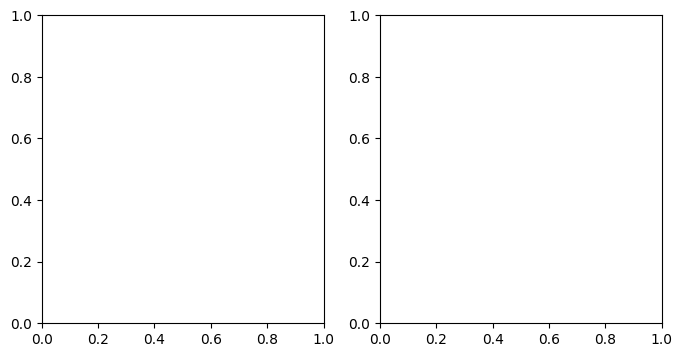

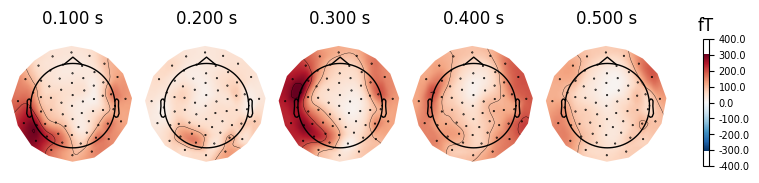

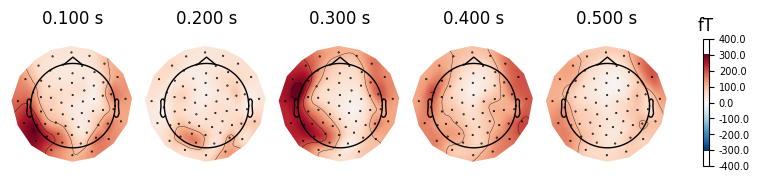

In [37]:
new_evoked.plot_topomap(times=[0.1, 0.2, 0.3, 0.4, 0.5], sphere=(0., 0., 0., 0.09))

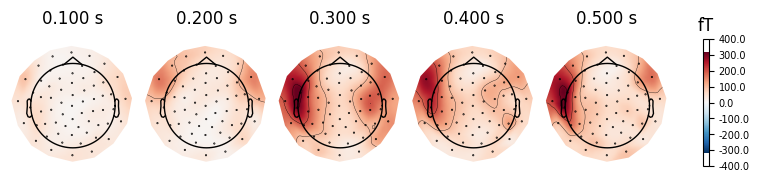

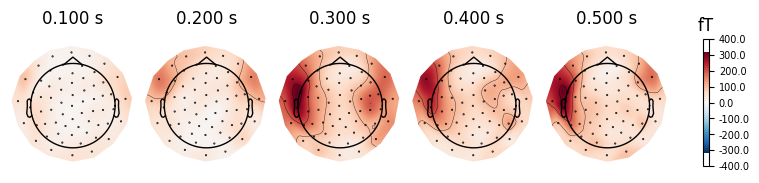

In [38]:
# Select magnetometer channels only
picks_mag = pick_types(evokeds['aud'].info, meg='mag')
# Extract data and compute magnitude
data = evokeds['aud'].data[picks_mag]
mag_data = np.linalg.norm(data.reshape(-1, 3, data.shape[-1]), axis=1)
# Clone info and drop extra channels
info = evokeds['aud'].copy().pick(picks_mag[::3]).info  # Assume channels are grouped [X,Y,Z]
new_evoked = EvokedArray(mag_data, info, tmin=evokeds['aud'].times[0])
new_evoked.plot_topomap(times=[0.1, 0.2, 0.3, 0.4, 0.5], sphere=(0., 0., 0., 0.09))

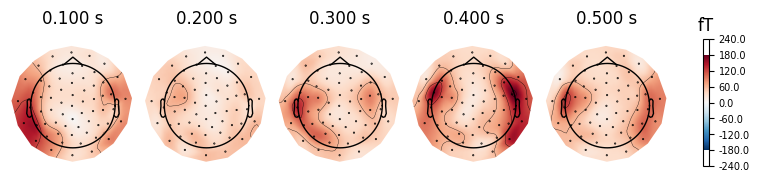

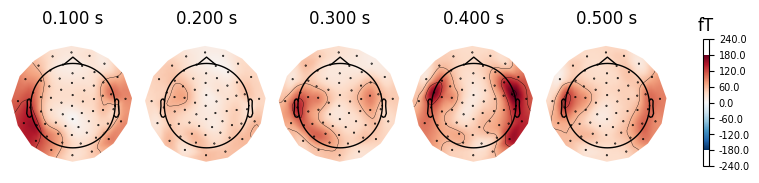

In [39]:
# Select magnetometer channels only
picks_mag = pick_types(evokeds['audvis'].info, meg='mag')
# Extract data and compute magnitude
data = evokeds['audvis'].data[picks_mag]
mag_data = np.linalg.norm(data.reshape(-1, 3, data.shape[-1]), axis=1)
# Clone info and drop extra channels
info = evokeds['audvis'].copy().pick(picks_mag[::3]).info  # Assume channels are grouped [X,Y,Z]
new_evoked = EvokedArray(mag_data, info, tmin=evokeds['audvis'].times[0])
new_evoked.plot_topomap(times=[0.1, 0.2, 0.3, 0.4, 0.5], sphere=(0., 0., 0., 0.09))

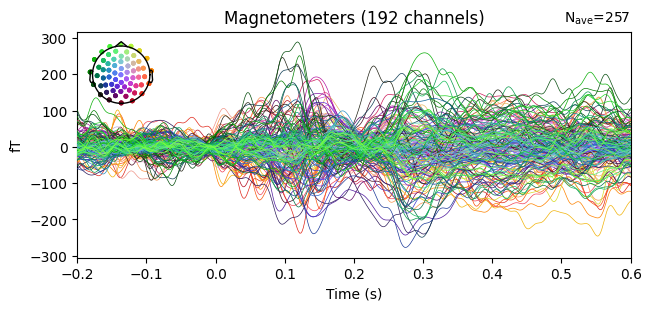

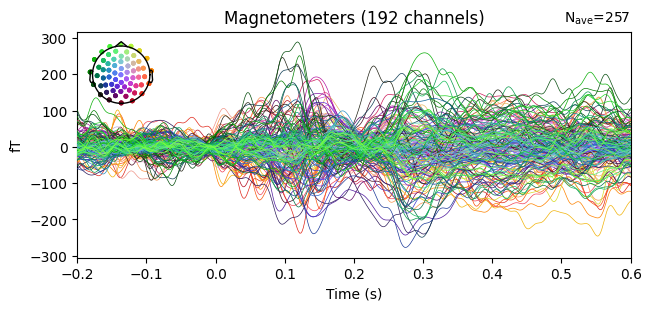

In [40]:
evokeds['vis'].plot(spatial_colors=True)

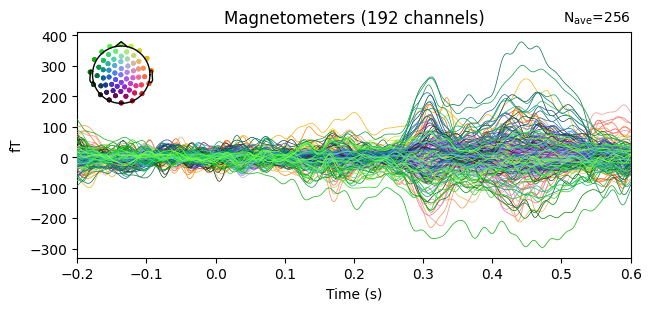

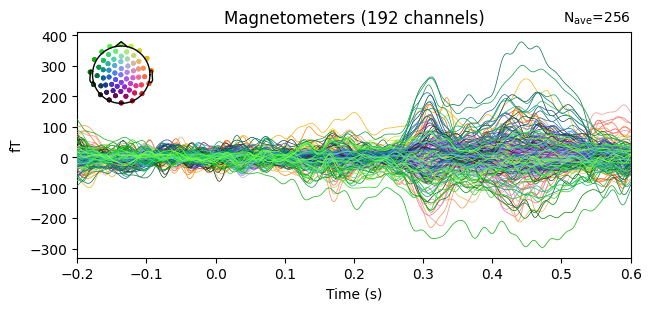

In [41]:
evokeds['aud'].plot(spatial_colors=True)

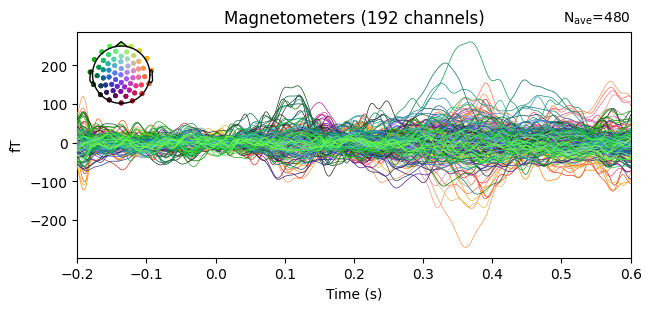

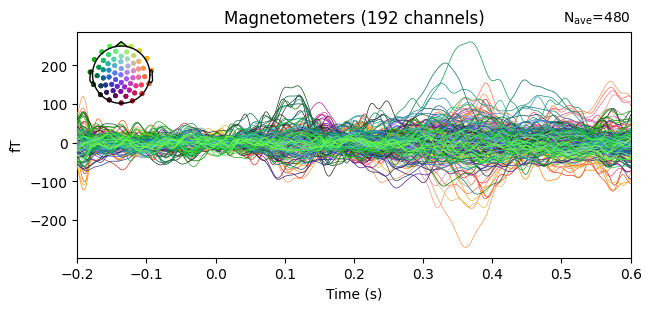

In [42]:
evokeds['audvis'].plot(spatial_colors=True)

In [43]:
print(new_evoked.data.min(), new_evoked.data.max())

5.272628774541407e-16 2.942143156941941e-13


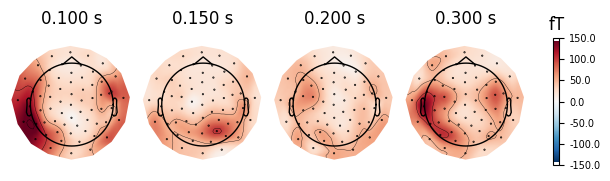

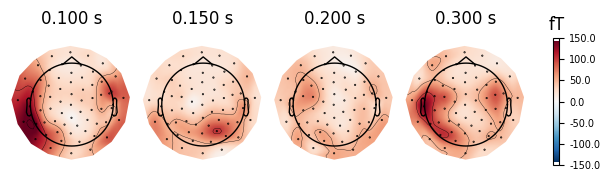

In [44]:
new_evoked.plot_topomap(
    times=[0.1, 0.15, 0.2, 0.3],
    ch_type='mag',
    sphere=(0., 0., 0., 0.09),
    cmap='RdBu_r',
    vlim=(None, None),  # Let MNE set limits automatically
    colorbar=True
)

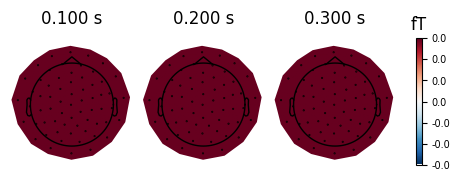

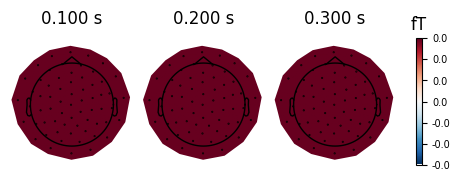

In [45]:
data = new_evoked.data
vmax = max(abs(data.min()), abs(data.max()))

new_evoked.plot_topomap(
    times=[0.1, 0.2, 0.3],
    ch_type='mag',
    sphere=(0., 0., 0., 0.09),
    cmap='RdBu_r',
    vlim=(-vmax, vmax),   # ✅ Manual symmetric scaling
    colorbar=True
)

In [46]:
print(evokeds['audvis'].ch_names[:50])

['Iz 1T Z', 'Iz 1T Y', 'Iz 1T X', 'O10 1U Z', 'O10 1U Y', 'O10 1U X', 'P10 1V Z', 'P10 1V Y', 'P10 1V X', 'O4 1W Z', 'O4 1W Y', 'O4 1W X', 'T14 1X Z', 'T14 1X Y', 'T14 1X X', 'T6 1Y Z', 'T6 1Y Y', 'T6 1Y X', 'O6 1Z Z', 'O6 1Z Y', 'O6 1Z X', 'T12 20 Z', 'T12 20 Y', 'T12 20 X', 'O8 21 Z', 'O8 21 Y', 'O8 21 X', 'O2 22 Z', 'O2 22 Y', 'O2 22 X', 'P12 23 Z', 'P12 23 Y', 'P12 23 X', 'P8 24 Z', 'P8 24 Y', 'P8 24 X', 'Pz 25 Z', 'Pz 25 Y', 'Pz 25 X', 'P2 26 Z', 'P2 26 Y', 'P2 26 X', 'C8 27 Z', 'C8 27 Y', 'C8 27 X', 'FCz 28 Z', 'FCz 28 Y', 'FCz 28 X', 'P6 29 Z', 'P6 29 Y']


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


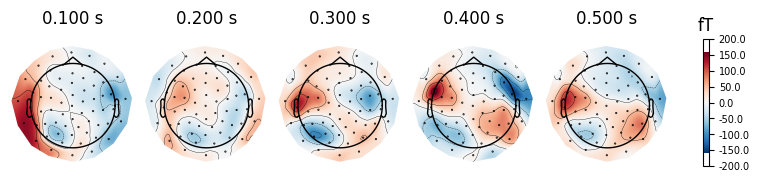

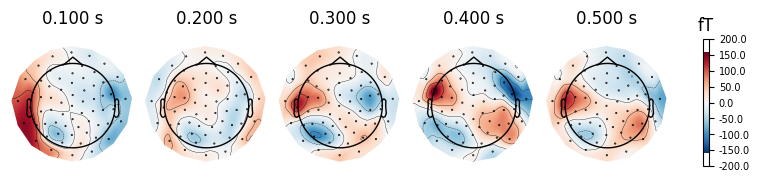

In [47]:
# Select all Z-axis magnetometer channels
z_channels = [ch for ch in evokeds['audvis'].ch_names if ch.endswith('Z')]

# Create a new evoked object with only Z-axis channels
evoked_z = evokeds['audvis'].copy().pick_channels(z_channels)

# Plot topomap with red-blue color scaling
evoked_z.plot_topomap(
    times=[0.1, 0.2, 0.3, 0.4, 0.5],
    ch_type='mag',
    sphere=(0., 0., 0., 0.09),
    cmap='RdBu_r',
    colorbar=True
)

In [48]:
# Select all Z-axis magnetometer channels
z_channels_audvis = [ch for ch in evokeds['audvis'].ch_names if ch.endswith('Z')]

# Create a new evoked object with only Z-axis channels
evoked_z_audvis = evokeds['audvis'].copy().pick_channels(z_channels)

# Select all Z-axis magnetometer channels
z_channels_vis = [ch for ch in evokeds['vis'].ch_names if ch.endswith('Z')]

# Create a new evoked object with only Z-axis channels
evoked_z_vis = evokeds['vis'].copy().pick_channels(z_channels)

# Select all Z-axis magnetometer channels
z_channels_aud = [ch for ch in evokeds['aud'].ch_names if ch.endswith('Z')]

# Create a new evoked object with only Z-axis channels
evoked_z_aud = evokeds['aud'].copy().pick_channels(z_channels)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


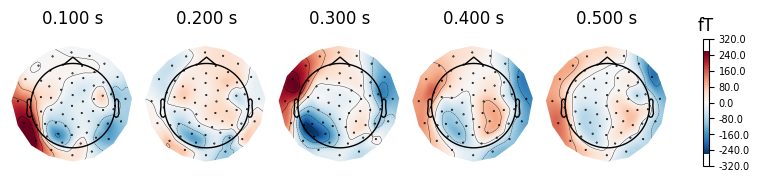

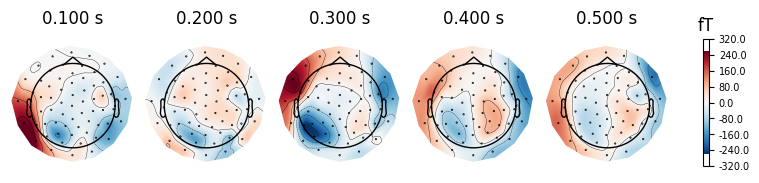

In [49]:
evoked_z_vis.plot_topomap(
    times=[0.1, 0.2, 0.3, 0.4, 0.5],
    ch_type='mag',
    sphere=(0., 0., 0., 0.09),
    cmap='RdBu_r',
    colorbar=True
)

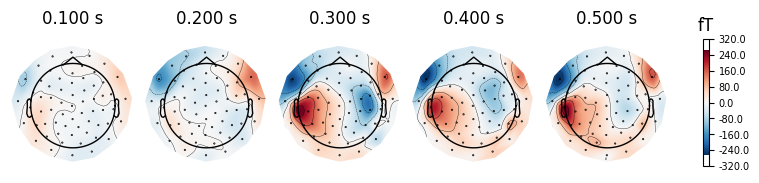

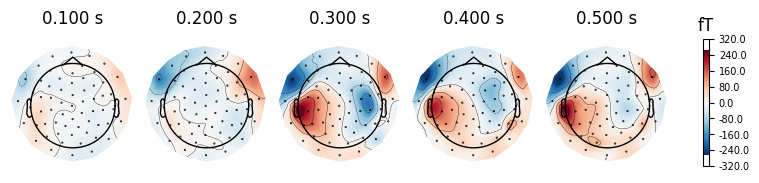

In [50]:
evoked_z_aud.plot_topomap(
    times=[0.1, 0.2, 0.3, 0.4, 0.5],
    ch_type='mag',
    sphere=(0., 0., 0., 0.09),
    cmap='RdBu_r',
    colorbar=True
)

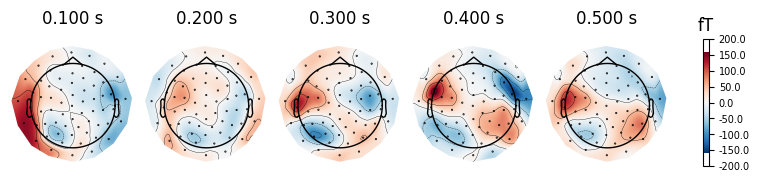

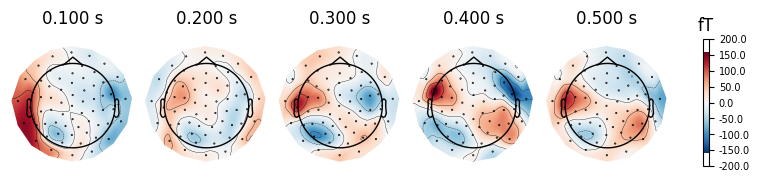

In [51]:
evoked_z_audvis.plot_topomap(
    times=[0.1, 0.2, 0.3, 0.4, 0.5],
    ch_type='mag',
    sphere=(0., 0., 0., 0.09),
    cmap='RdBu_r',
    colorbar=True
)

No projector specified for this dataset. Please consider the method self.add_proj.


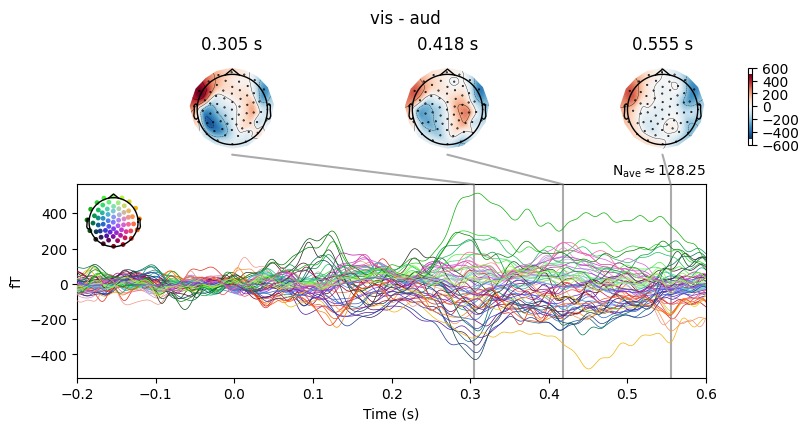

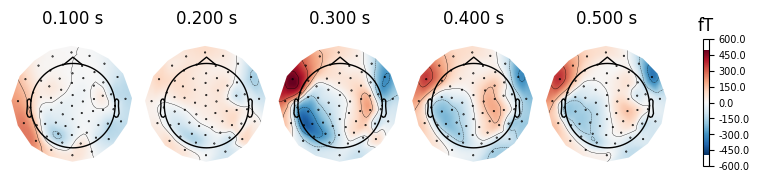

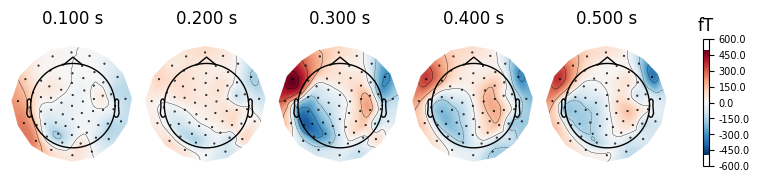

In [52]:
ev_diff = mne.combine_evoked([evoked_z_vis, evoked_z_aud], weights=[1, -1])
ev_diff.plot_joint(title='vis - aud')
ev_diff.plot_topomap(
    times=[0.1, 0.2, 0.3, 0.4, 0.5],
    sphere=(0., 0., 0., 0.09),
    cmap='RdBu_r',
    colorbar=True
)

No projector specified for this dataset. Please consider the method self.add_proj.


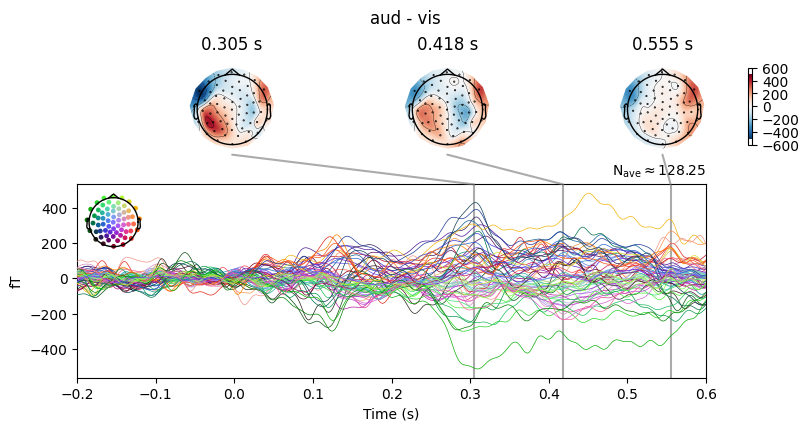

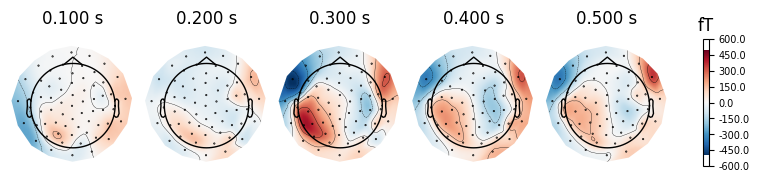

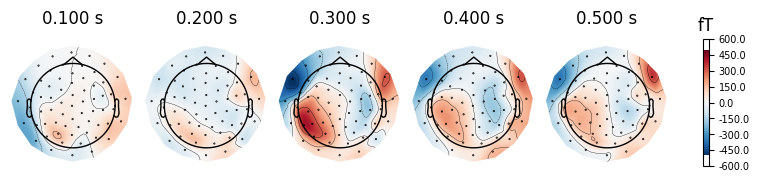

In [53]:
ev_diff = mne.combine_evoked([evoked_z_aud, evoked_z_vis], weights=[1, -1])
ev_diff.plot_joint(title='aud - vis')
ev_diff.plot_topomap(
    times=[0.1, 0.2, 0.3, 0.4, 0.5],
    sphere=(0., 0., 0., 0.09),
    cmap='RdBu_r',
    colorbar=True
)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   10.3s


Applying baseline correction (mode: logratio)


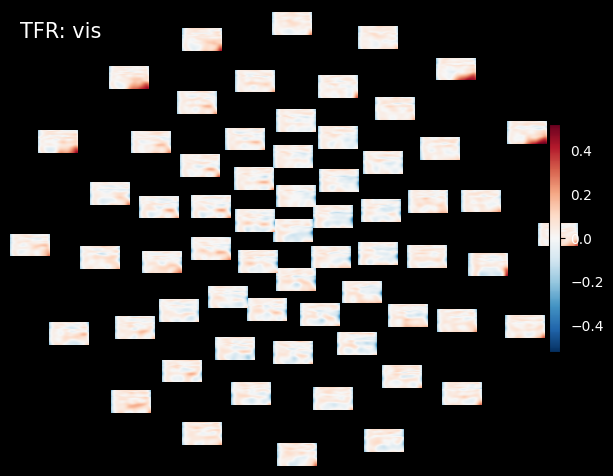

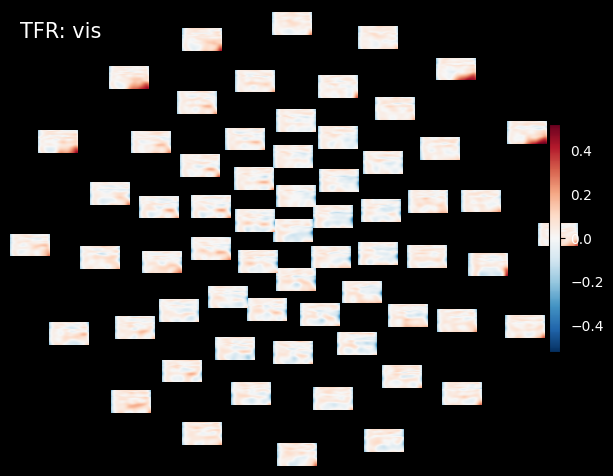

In [54]:
from mne.time_frequency import tfr_morlet
#import numpy as np

# Use only Z-channel magnetometers
z_channels_tf = [ch for ch in epochs.ch_names if ch.endswith('Z')]
epochs_z_tf = epochs.copy().pick_channels(z_channels_tf)

# Define frequencies and cycles
freqs = np.logspace(np.log10(4), np.log10(40), 20)  # 4–40 Hz
n_cycles = freqs / 2.  # ~2 cycles per freq

# Run TFR on a specific condition
power = tfr_morlet(epochs_z_tf['vis'], freqs=freqs, n_cycles=n_cycles,
                   return_itc=False, average=True)

# Plot power over time and frequency
power.plot_topo(baseline=(-0.2, 0), mode='logratio', title='TFR: vis')

In [55]:
# Update for epochs
epochs_z = epochs.copy().pick([ch for ch in epochs.ch_names if ch.endswith('Z')])

# Update for evoked
ev_vis_z = evokeds['vis'].copy().pick([ch for ch in evokeds['vis'].ch_names if ch.endswith('Z')])
#ev_aud_z = evokeds['aud'].copy().pick([ch for ch in evokeds['aud'].ch_names if ch.endswith('Z')])
# Define frequencies and cycles
freqs = np.logspace(np.log10(4), np.log10(40), 20)
n_cycles = freqs / 2.

# Use compute_tfr with method="morlet"
power = epochs_z['vis'].compute_tfr(
    method='morlet',
    freqs=freqs,
    n_cycles=n_cycles,
    average=True,
    return_itc=False
)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Applying baseline correction (mode: logratio)


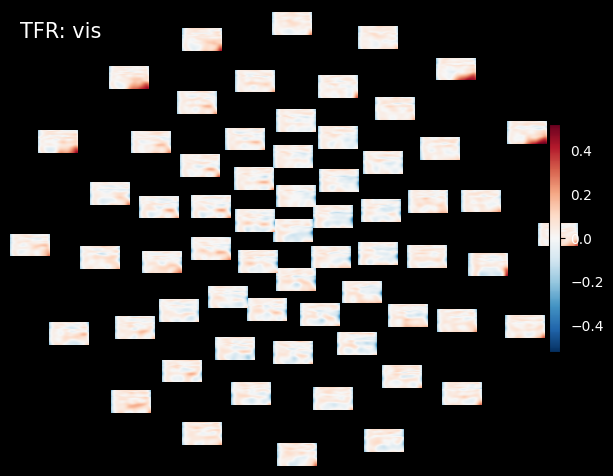

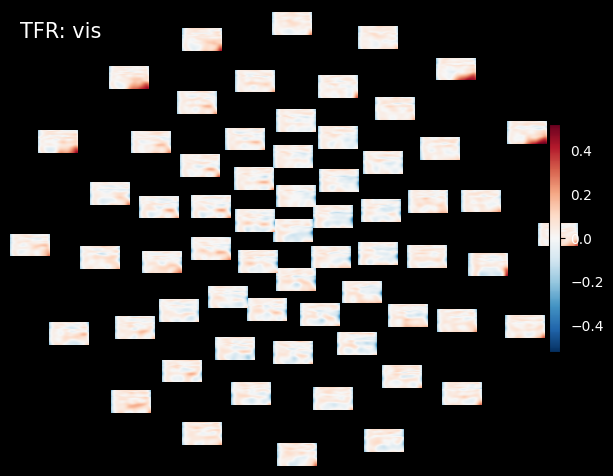

In [56]:
power.plot_topo(baseline=(-0.2, 0), mode='logratio', title='TFR: vis')

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


Applying baseline correction (mode: logratio)


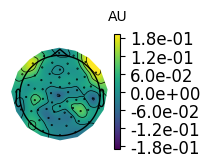

Applying baseline correction (mode: logratio)


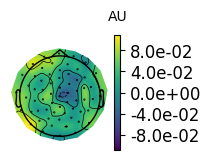

Applying baseline correction (mode: logratio)


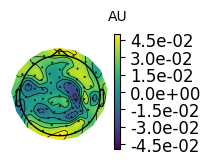

Applying baseline correction (mode: logratio)


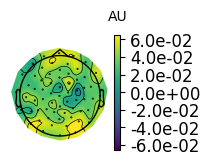

In [57]:
freqs = np.linspace(4, 40, 30)
n_cycles = freqs / 2

# Compute time-frequency representation using the new API
tfr_vis = epochs_z['vis'].compute_tfr(
    method='morlet',
    freqs=freqs,
    n_cycles=n_cycles,
    return_itc=False,
    average=True
)

bands = {
    "theta": (4, 7),
    "alpha": (8, 12),
    "beta": (13, 30),
    "gamma": (31, 40)
}

for band, (fmin, fmax) in bands.items():
    tfr_vis.plot_topomap(
        fmin=fmin, fmax=fmax,
        tmin=0.1, tmax=0.4,  # Adjust as needed
        baseline=(-0.2, 0),
        mode='logratio',
        cmap='viridis'
    )


In [58]:
tfr_vis.plot_topomap?

Signature:
tfr_vis.plot_topomap(
    tmin=None,
    tmax=None,
    fmin=0.0,
    fmax=inf,
    *,
    ch_type=None,
    baseline=None,
    mode='mean',
    sensors=True,
    show_names=False,
    mask=None,
    mask_params=None,
    contours=6,
    outlines='head',
    sphere=None,
    image_interp='cubic',
    extrapolate='auto',
    border='mean',
    res=64,
    size=2,
    cmap=None,
    vlim=(None, None),
    cnorm=None,
    colorbar=True,
    cbar_fmt='%1.1e',
    units=None,
    axes=None,
    show=True,
)
Docstring:
Plot topographic maps of specific time-frequency intervals of TFR data.

Parameters
----------
tmin, tmax : float | None
    First and last times to include, in seconds. ``None`` uses the first or
    last time present in the data. Default is ``tmin=None, tmax=None`` (all
    times).
fmin, fmax : float
    The lower- and upper-bound on frequencies of interest. Default is
    ``fmin=0, fmax=np.inf`` (spans all frequencies present in the data).
ch_type : 'mag' | 'grad

In [59]:
#PIPELINE STARTS HERE?

combining channels using RMS (mag channels)
combining channels using RMS (mag channels)


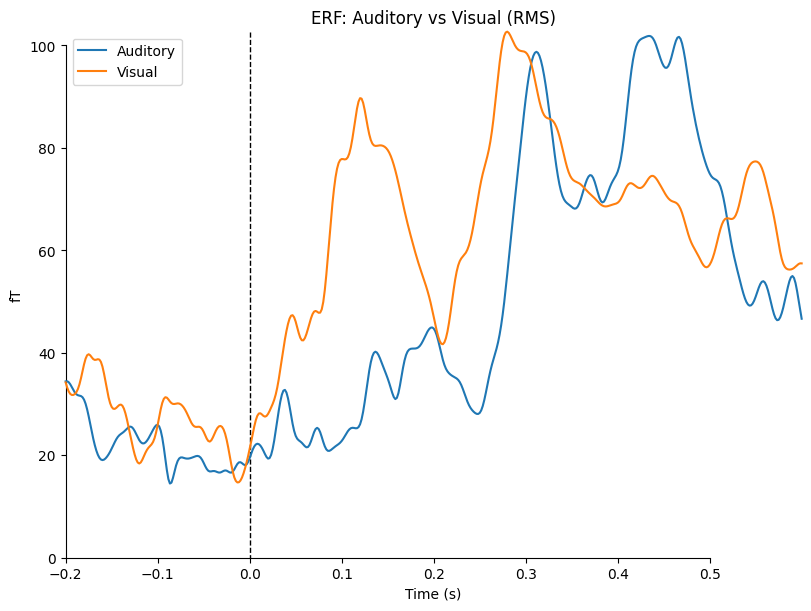

[<Figure size 800x600 with 1 Axes>]

In [60]:
# Get Z-axis evoked responses
ev_aud = evokeds['aud'].copy().pick([ch for ch in evokeds['aud'].ch_names if ch.endswith('Z')])
ev_vis = evokeds['vis'].copy().pick([ch for ch in evokeds['vis'].ch_names if ch.endswith('Z')])

# Plot side-by-side
mne.viz.plot_compare_evokeds({'Auditory': ev_aud, 'Visual': ev_vis}, picks='mag', title='ERF: Auditory vs Visual')


No projector specified for this dataset. Please consider the method self.add_proj.


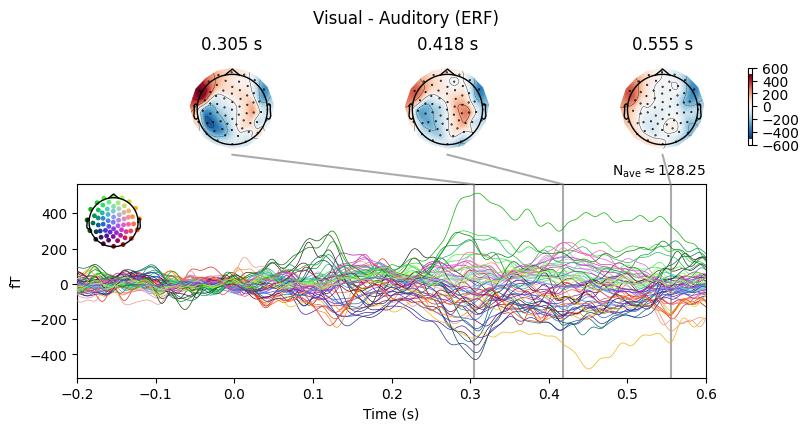

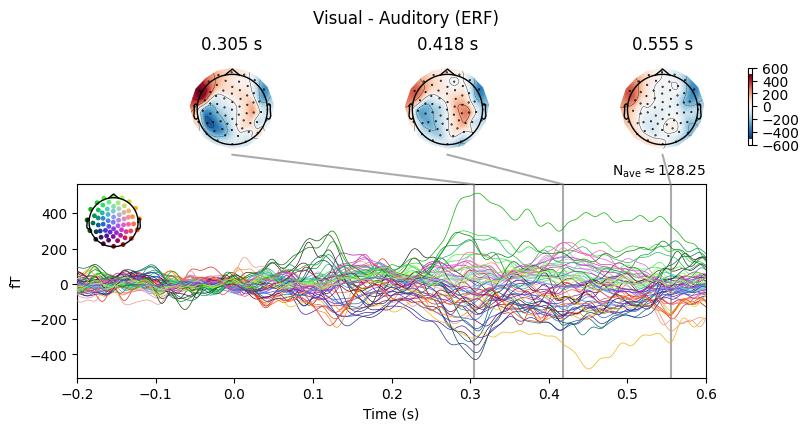

In [61]:
ev_diff = mne.combine_evoked([ev_vis, ev_aud], weights=[1, -1])
ev_diff.plot_joint(title='Visual - Auditory (ERF)')

In [62]:
tfr_aud = epochs_z['aud'].compute_tfr(method='morlet', freqs=freqs, n_cycles=n_cycles, average=True)
tfr_vis = epochs_z['vis'].compute_tfr(method='morlet', freqs=freqs, n_cycles=n_cycles, average=True

SyntaxError: incomplete input (3843219343.py, line 2)

Applying baseline correction (mode: logratio)


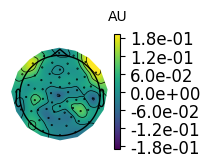

Visual - Theta Band


NameError: name 'tfr_aud' is not defined

In [63]:
for band, (fmin, fmax) in bands.items():
    # Plot visual
    fig_vis = tfr_vis.plot_topomap(
        fmin=fmin, fmax=fmax, tmin=0.1, tmax=0.4,
        baseline=(-0.2, 0), mode='logratio',
        cmap='viridis'
    )
    print(f'Visual - {band.capitalize()} Band')
    
    # Plot auditory
    fig_aud = tfr_aud.plot_topomap(
        fmin=fmin, fmax=fmax, tmin=0.1, tmax=0.4,
        baseline=(-0.2, 0), mode='logratio',
        cmap='viridis'
    )
    print(f'Auditory - {band.capitalize()} Band')

In [64]:
# Use Z-channels only
epochs_z = epochs.copy().pick([ch for ch in epochs.ch_names if ch.endswith('Z')])

freqs = np.linspace(8, 12, 10)  # Alpha band as an example
n_cycles = freqs / 2.

# Compute trial-level TFRs
tfr_aud = epochs_z['aud'].compute_tfr(method='morlet', freqs=freqs, n_cycles=n_cycles,
                                      average=False, return_itc=False)
tfr_vis = epochs_z['vis'].compute_tfr(method='morlet', freqs=freqs, n_cycles=n_cycles,
                                      average=False, return_itc=False)

aud_data = tfr_aud.data.mean(axis=2)[..., tfr_aud.time_as_index([0.1, 0.4])[0]:tfr_aud.time_as_index([0.1, 0.4])[1]].mean(axis=-1)
vis_data = tfr_vis.data.mean(axis=2)[..., tfr_vis.time_as_index([0.1, 0.4])[0]:tfr_vis.time_as_index([0.1, 0.4])[1]].mean(axis=-1)

# Shape check: (n_epochs, n_channels)
print(aud_data.shape, vis_data.shape)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


(256, 64) (257, 64)


In [65]:
from mne.stats import permutation_cluster_test

X = [aud_data, vis_data]  # shape: list of (n_epochs, n_channels)

T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    X, n_permutations=1000, tail=0, seed=42
)

Using a threshold of 3.859721
stat_fun(H1): min=0.00017060049150943217 max=17.086265523926524
Running initial clustering …
Found 7 clusters


/var/folders/89/53wyx_3n7wj89ttqjws8msdc0000gn/T/ipykernel_88645/734470431.py:5: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

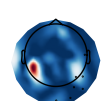

Text(0.5, 1.0, 'Auditory vs Visual (Alpha Power): Significant Sensors')

In [66]:
significant_mask = cluster_p_values < 0.05

# Create a topomap from the T-values (e.g., first time point)
mne.viz.plot_topomap(
    T_obs, tfr_aud.info,
    mask=significant_mask,
    cmap='RdBu_r', show=True,
    mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=5),
    sphere=(0., 0., 0., 0.09),
    contours=0
)
plt.title('Auditory vs Visual (Alpha Power): Significant Sensors')

In [67]:
sig_cluster_inds = np.where(cluster_p_values < 0.05)[0]

In [68]:
cluster_p_values

array([0.396, 0.631, 0.21 , 0.611, 0.107, 0.412, 0.091])

In [69]:
significant_mask

array([False, False, False, False, False, False, False])

In [70]:
print("T max:", T_obs.max(), "T min:", T_obs.min())
print("Cluster p-values:", cluster_p_values)

T max: 17.086265523926524 T min: 0.00017060049150943217
Cluster p-values: [0.396 0.631 0.21  0.611 0.107 0.412 0.091]


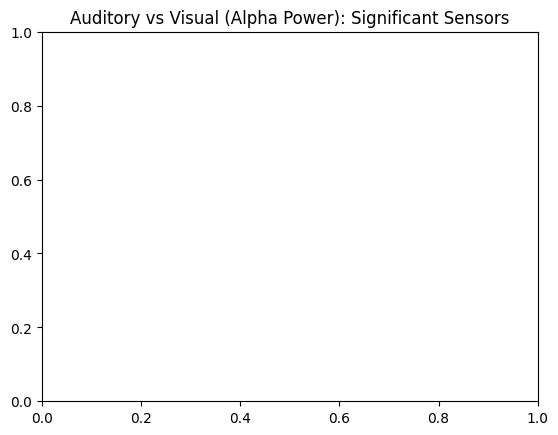

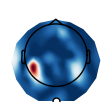

Text(0.5, 1.0, 'Exploratory Cluster (p=0.091)')

In [71]:
cluster_idx = 6  # or np.argmin(cluster_p_values) to get the "best"
sig_mask = clusters[cluster_idx]  # boolean mask of shape (n_channels,)

# Visualize the topomap
mne.viz.plot_topomap(
    T_obs, tfr_aud.info,
    mask=sig_mask[0],
    cmap='RdBu_r', show=True,
    mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=5),
    sphere=(0., 0., 0., 0.09),
    contours=0
)
plt.title(f'Exploratory Cluster (p={cluster_p_values[cluster_idx]:.3f})')

In [72]:
sig_mask

(array([49]),)

In [73]:
# Extract data from TFR: (n_trials, n_channels, n_freqs, n_times)
aud_data = tfr_aud.data[:, sig_mask, :, :]  # shape: (256, n_cluster_chans, n_freqs, 481)
vis_data = tfr_vis.data[:, sig_mask, :, :]

# Remove singleton dims if they exist (just in case)
aud_data = np.squeeze(aud_data)
vis_data = np.squeeze(vis_data)

# Now average over channels (axis=1 if >1 channel) and frequencies (axis=1 again)
if aud_data.ndim == 3:
    # Already (n_trials, freqs, times) → avg over freqs
    aud_alpha = aud_data.mean(axis=1)
    vis_alpha = vis_data.mean(axis=1)
elif aud_data.ndim == 4:
    # (n_trials, channels, freqs, times)
    aud_alpha = aud_data.mean(axis=1).mean(axis=1)  # → (n_trials, times)
    vis_alpha = vis_data.mean(axis=1).mean(axis=1)
else:
    raise ValueError(f"Unexpected data shape: {aud_data.shape}")


In [74]:
times = tfr_aud.times

aud_mean = aud_alpha.mean(axis=0)
aud_sem = sem(aud_alpha, axis=0)
vis_mean = vis_alpha.mean(axis=0)
vis_sem = sem(vis_alpha, axis=0)

plt.figure(figsize=(8, 4))
plt.plot(times, aud_mean, label='Auditory', color='blue')
plt.fill_between(times, aud_mean - aud_sem, aud_mean + aud_sem, alpha=0.3, color='blue')

plt.plot(times, vis_mean, label='Visual', color='green')
plt.fill_between(times, vis_mean - vis_sem, vis_mean + vis_sem, alpha=0.3, color='green')

plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Alpha Power (AU)')
plt.title('Alpha Power Time Course in Exploratory Cluster')
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'sem' is not defined

In [75]:
aud_data.shape

(256, 10, 481)

In [76]:
def extract_band_power(epochs_z, condition, band, tmin=0.1, tmax=0.4):
    fmin, fmax = band
    freqs = np.linspace(fmin, fmax, 10)
    n_cycles = freqs / 2.

    tfr = epochs_z[condition].compute_tfr(method='morlet', freqs=freqs, n_cycles=n_cycles,
                                          average=False, return_itc=False)

    # Time indices
    tmin_idx = tfr.time_as_index(tmin)[0]
    tmax_idx = tfr.time_as_index(tmax)[0]

    # Average over frequencies and the selected time window
    power = tfr.data.mean(axis=2)[..., tmin_idx:tmax_idx].mean(axis=-1)
    return power, tfr

In [77]:
bands = {
    "theta": (4, 7),
    "alpha": (8, 12),
    "beta": (13, 30),
    "gamma": (31, 40)
}

for band_name, band_range in bands.items():

    if band_name != "test":
        aud_band_data, tfr_aud = extract_band_power(epochs_z, 'aud', band_range)
        vis_band_data, tfr_vis = extract_band_power(epochs_z, 'vis', band_range)
        
        print(f"{band_name.capitalize()} band: aud {aud_band_data.shape}, vis {vis_band_data.shape}")
    
        X = [aud_band_data, vis_band_data]  # shape: list of (n_epochs, n_channels)
    
        T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
            X, n_permutations=1000, tail=0, seed=42
        )
    
        print(cluster_p_values)
    
        significant_mask = cluster_p_values < 0.05
tfr_aud.plot(baseline=(-0.2, 0), mode='logratio')
tfr_vis.plot(baseline=(-0.2, 0), mode='logratio')
        #sig_cluster_inds = np.where(cluster_p_values < 0.05)[0]

        #if len(sig_cluster_inds) == 0:
        #    print("No significant clusters found.")
        #else:
        #    cluster_idx = sig_cluster_inds[0]
        #    sig_mask = clusters[cluster_idx] 
    
            # Create a topomap from the T-values (e.g., first time point)
        mne.viz.plot_topomap(
            T_obs, tfr_aud.info,
            mask=significant_mask,
            cmap='RdBu_r', show=True,
            mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=5),
            sphere=(0., 0., 0., 0.09),
            contours=0
        )
        plt.title('Auditory vs Visual ' + band_name + ": Significant Sensors")


                # Extract data from TFR: (n_trials, n_channels, n_freqs, n_times)
    

IndentationError: unexpected indent (1321661336.py, line 36)

In [78]:
sig_mask[0]

array([49])

In [79]:
significant_mask.shape

(7,)

In [80]:
clusters[

SyntaxError: incomplete input (1087193831.py, line 1)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Beta band: aud (256, 64), vis (257, 64)
Using a threshold of 3.859721
stat_fun(H1): min=0.04528140263125767 max=17.269708969869523
Running initial clustering …
Found 16 clusters


/var/folders/89/53wyx_3n7wj89ttqjws8msdc0000gn/T/ipykernel_88645/72423911.py:14: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Cluster p-values: [0.621 0.179 0.232 0.041 0.028 0.185 0.349 0.626 0.429 0.192 0.023 0.09
 0.121 0.031 0.048 0.009]


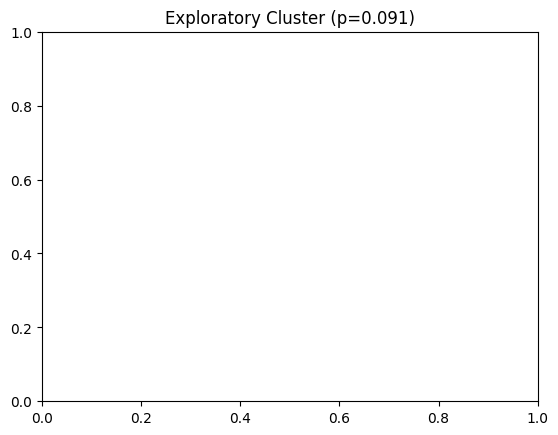

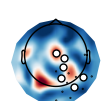

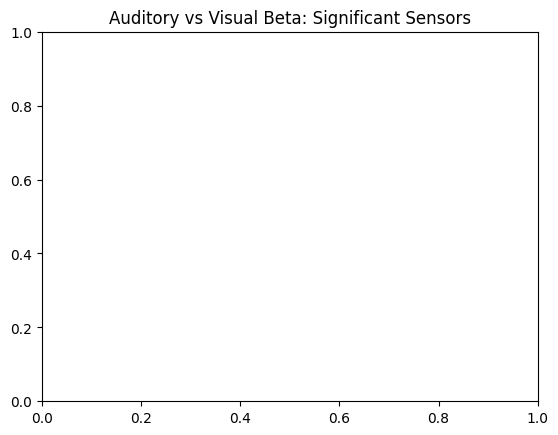

NameError: name 'sem' is not defined

In [81]:
bands = {
    "beta": (13, 30)
}

for band_name, band_range in bands.items():
    # Extract beta-band power (average over freqs and 0.1–0.4 s window)
    aud_band_data, tfr_aud = extract_band_power(epochs_z, 'aud', band_range)
    vis_band_data, tfr_vis = extract_band_power(epochs_z, 'vis', band_range)

    print(f"{band_name.capitalize()} band: aud {aud_band_data.shape}, vis {vis_band_data.shape}")

    # Run cluster permutation test
    X = [aud_band_data, vis_band_data]  # shape: (n_trials, n_channels)
    T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
        X, n_permutations=1000, tail=0, seed=42
    )

    
    print("Cluster p-values:", cluster_p_values)

    sig_cluster_inds = np.where(cluster_p_values < 0.05)[0]
    if len(sig_cluster_inds) == 0:
        print("No significant clusters found.")
        continue

    

    #cluster_idx = sig_cluster_inds[5]
    #sig_mask = clusters[cluster_idx][0]  # boolean mask per channel

    significant_mask = cluster_p_values < 0.05
    # Plot topomap
    mne.viz.plot_topomap(
        T_obs, tfr_aud.info,
        mask=significant_mask,
        cmap='RdBu_r',
        mask_params=dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=5),
        sphere=(0., 0., 0., 0.09),
        contours=0
    )
    plt.title(f'Auditory vs Visual {band_name.capitalize()}: Significant Sensors')
    plt.show()

    for cluster_idx in sig_cluster_inds:
        sig_mask = clusters[cluster_idx][0]
        # Extract time courses from significant sensors
        beta_inds = np.where((tfr_aud.freqs >= band_range[0]) & (tfr_aud.freqs <= band_range[1]))[0]
        sig_mask_bool = sig_mask
    
        aud_data = tfr_aud.data[:, sig_mask_bool, :, :]  # (trials, channels, freqs, times)
        vis_data = tfr_vis.data[:, sig_mask_bool, :, :]
    
        aud_power = aud_data[:, :, beta_inds, :].mean(axis=1).mean(axis=1)  # (trials, times)
        vis_power = vis_data[:, :, beta_inds, :].mean(axis=1).mean(axis=1)
    
        times = tfr_aud.times
        aud_mean = aud_power.mean(axis=0)
        aud_sem = sem(aud_power, axis=0)
        vis_mean = vis_power.mean(axis=0)
        vis_sem = sem(vis_power, axis=0)
    
        # Plot time course
        plt.figure(figsize=(8, 4))
        plt.plot(times, aud_mean, label='Auditory', color='blue')
        plt.fill_between(times, aud_mean - aud_sem, aud_mean + aud_sem, alpha=0.3, color='blue')
        plt.plot(times, vis_mean, label='Visual', color='green')
        plt.fill_between(times, vis_mean - vis_sem, vis_mean + vis_sem, alpha=0.3, color='green')
        plt.axvline(0, color='black', linestyle='--')
        plt.xlabel('Time (s)')
        plt.ylabel(f'{band_name.capitalize()} Power (AU)')
        plt.title(f'{band_name.capitalize()} Power Time Course in Significant Cluster')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [ ]:
sig_mask_bool

In [ ]:
sig_cluster_inds

In [ ]:
np.where(cluster_p_values < 0.05)[0]

In [ ]:
cluster_p_values < 0.05

In [ ]:
significant_mask

In [ ]:
sig_mask

In [ ]:
sig_cluster_inds

In [ ]:
sig_mask

In [ ]:
sig_cluster_inds

In [ ]:
clusters[sig_cluster_inds]

In [ ]:
print(len(epochs_z['aud']), len(epochs_z['vis']))

In [ ]:
tfr_aud.average().plot(baseline=(-0.2, 0), mode='logratio')
#tfr_vis.plot(baseline=(-0.2, 0), mode='logratio')

In [ ]:
tfr_aud

/var/folders/89/53wyx_3n7wj89ttqjws8msdc0000gn/T/ipykernel_88645/3148641417.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


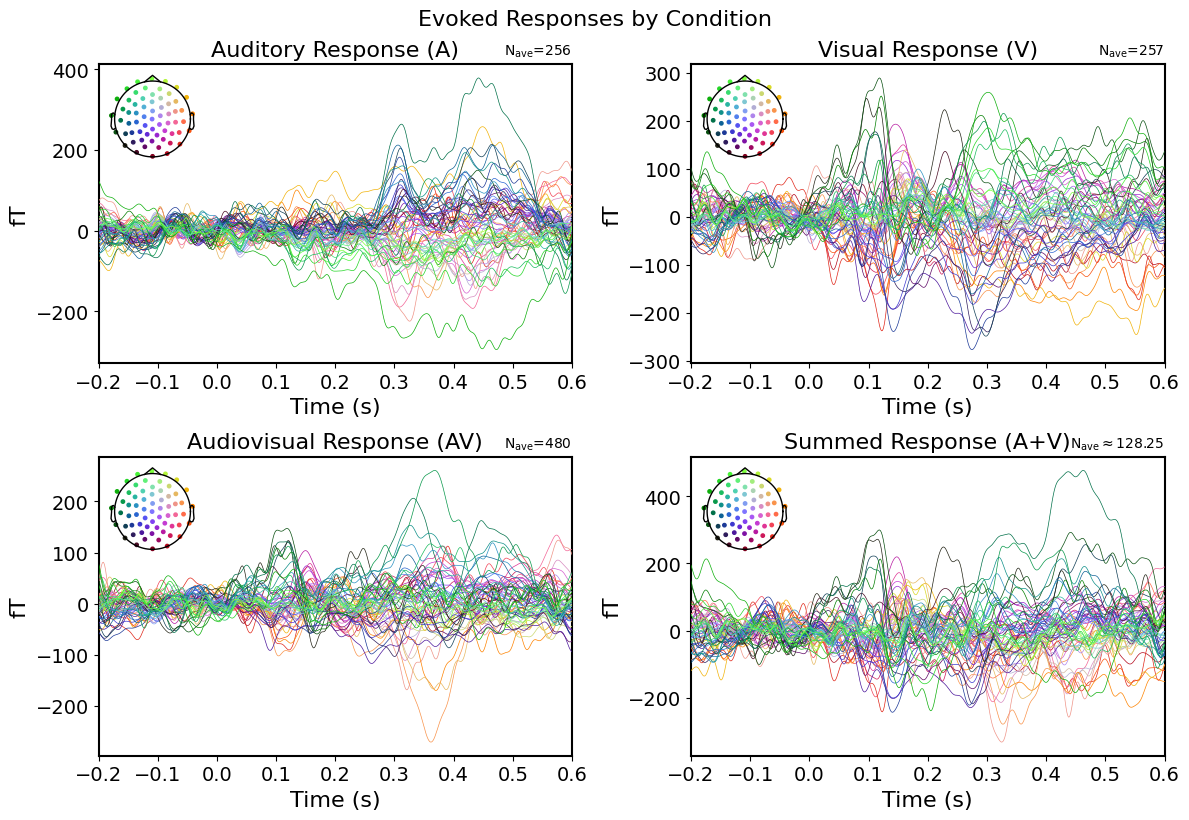

/var/folders/89/53wyx_3n7wj89ttqjws8msdc0000gn/T/ipykernel_88645/3148641417.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


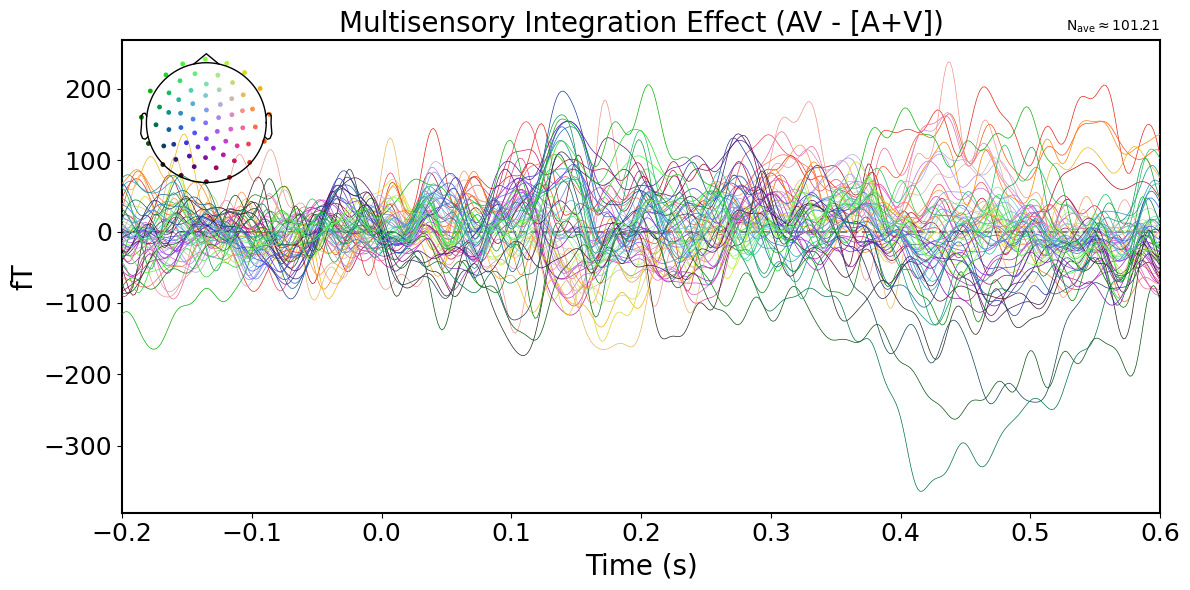

In [ ]:
## ZZ Pipeline
from mne.stats import permutation_cluster_test
from scipy.stats import sem
from scipy.stats import ttest_rel
import seaborn as sns

#M ultisensory Analysis
# select Z-axis magnetometer channels for better SNR
z_channels = [ch for ch in evokeds['audvis'].ch_names if ch.endswith('Z')]

# creating Z-channel versions of evoked responses for each condition
ev_aud_z = evokeds['aud'].copy().pick(z_channels)
ev_vis_z = evokeds['vis'].copy().pick(z_channels)
ev_audvis_z = evokeds['audvis'].copy().pick(z_channels)
# creating summed response (A+V) - theoretical purely additive response
ev_sum = mne.combine_evoked([ev_aud_z, ev_vis_z], weights=[1, 1])

# compute difference between actual audiovisual response and summed response (AV - [A+V])
ev_diff_integration = mne.combine_evoked([ev_audvis_z, ev_sum], weights=[1, -1])

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

ev_aud_z.plot(axes=axs[0, 0], spatial_colors=True, show=False)
axs[0, 0].set_title('Auditory Response (A)', fontsize=16)
axs[0, 0].tick_params(axis='both', which='major', labelsize=14)
for axis in ['top', 'bottom', 'left', 'right']:
    axs[0, 0].spines[axis].set_linewidth(1.5)
axs[0, 0].set_xlabel(axs[0, 0].get_xlabel(), fontsize=16)
axs[0, 0].set_ylabel(axs[0, 0].get_ylabel(), fontsize=16)

ev_vis_z.plot(axes=axs[0, 1], spatial_colors=True, show=False)
axs[0, 1].set_title('Visual Response (V)', fontsize=16)
axs[0, 1].tick_params(axis='both', which='major', labelsize=14)
for axis in ['top', 'bottom', 'left', 'right']:
    axs[0, 1].spines[axis].set_linewidth(1.5)
axs[0, 1].set_xlabel(axs[0, 1].get_xlabel(), fontsize=16)
axs[0, 1].set_ylabel(axs[0, 1].get_ylabel(), fontsize=16)

ev_audvis_z.plot(axes=axs[1, 0], spatial_colors=True, show=False)
axs[1, 0].set_title('Audiovisual Response (AV)', fontsize=16)
axs[1, 0].tick_params(axis='both', which='major', labelsize=14)
for axis in ['top', 'bottom', 'left', 'right']:
    axs[1, 0].spines[axis].set_linewidth(1.5)
axs[1, 0].set_xlabel(axs[1, 0].get_xlabel(), fontsize=16)
axs[1, 0].set_ylabel(axs[1, 0].get_ylabel(), fontsize=16)

ev_sum.plot(axes=axs[1, 1], spatial_colors=True, show=False)
axs[1, 1].set_title('Summed Response (A+V)', fontsize=16)
axs[1, 1].tick_params(axis='both', which='major', labelsize=14)
for axis in ['top', 'bottom', 'left', 'right']:
    axs[1, 1].spines[axis].set_linewidth(1.5)
axs[1, 1].set_xlabel(axs[1, 1].get_xlabel(), fontsize=16)
axs[1, 1].set_ylabel(axs[1, 1].get_ylabel(), fontsize=16)

fig.tight_layout()
plt.suptitle('Evoked Responses by Condition', fontsize=16, y=1.02)
plt.savefig('sensory_traces.png', dpi=400)
plt.show()

# Plot the difference wave (AV - [A+V]) with updated font sizes
fig, ax = plt.subplots(figsize=(12, 6))
ev_diff_integration.plot(axes=ax, spatial_colors=True, show=False)
ax.set_title('Multisensory Integration Effect (AV - [A+V])', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
ax.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.savefig('differences.png', dpi=400)
plt.tight_layout()
plt.show()

In [ ]:
# single-trial data for each condition
X_av_full = epochs['audvis'].get_data(picks_mag)
X_a_full  = epochs['aud'].get_data(     picks_mag)
X_v_full  = epochs['vis'].get_data(     picks_mag)

# trial count alignment
n = min(X_av_full.shape[0], X_a_full.shape[0], X_v_full.shape[0])
X_av = X_av_full[:n]
X_sum = X_a_full[:n] + X_v_full[:n]
diff  = X_av - X_sum     # shape (n, n_ch, n_times)

# mag-sensor adjacency
connectivity, ch_names = find_ch_adjacency(epochs.info, ch_type='mag')

# one-sample cluster test vs zero
T_obs, clusters, p_vals, H0 = permutation_cluster_1samp_test(
    diff,
    adjacency=connectivity,
    n_permutations=1000,
    threshold=None,
    tail=0,
    out_type='mask'
)

# report clusters with p<.05
for idx, mask in enumerate(clusters):
    if p_vals[idx] < 0.05:
        ch_idx, t_idx = np.where(mask)
        t0, t1 = times_ms[t_idx.min()], times_ms[t_idx.max()]
        n_ch    = np.unique(ch_idx).size
        print(f"Cluster {idx}: p={p_vals[idx]:.3f}, "
              f"{n_ch} channels, {t0:.1f}–{t1:.1f} ms")

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.


ValueError: The following electrodes have overlapping positions, which causes problems during visualization:
Iz 1T Z, Iz 1T Y, Iz 1T X, O10 1U Z, O10 1U Y, O10 1U X, P10 1V Z, P10 1V Y, P10 1V X, O4 1W Z, O4 1W Y, O4 1W X, T14 1X Z, T14 1X Y, T14 1X X, T6 1Y Z, T6 1Y Y, T6 1Y X, O6 1Z Z, O6 1Z Y, O6 1Z X, T12 20 Z, T12 20 Y, T12 20 X, O8 21 Z, O8 21 Y, O8 21 X, O2 22 Z, O2 22 Y, O2 22 X, P12 23 Z, P12 23 Y, P12 23 X, P8 24 Z, P8 24 Y, P8 24 X, Pz 25 Z, Pz 25 Y, Pz 25 X, P2 26 Z, P2 26 Y, P2 26 X, C8 27 Z, C8 27 Y, C8 27 X, FCz 28 Z, FCz 28 Y, FCz 28 X, P6 29 Z, P6 29 Y, P6 29 X, P4 2A Z, P4 2A Y, P4 2A X, C6 2B Z, C6 2B Y, C6 2B X, C4 2C Z, C4 2C Y, C4 2C X, F12 2D Z, F12 2D Y, F12 2D X, C2 2E Z, C2 2E Y, C2 2E X, F6 2F Z, F6 2F Y, F6 2F X, AFz 2G Z, AFz 2G Y, AFz 2G X, T8 2H Z, T8 2H Y, T8 2H X, T10 2I Z, T10 2I Y, T10 2I X, T4 2J Z, T4 2J Y, T4 2J X, F8 2K Z, F8 2K Y, F8 2K X, T2 2L Z, T2 2L Y, T2 2L X, F2 2M Z, F2 2M Y, F2 2M X, F4 2N Z, F4 2N Y, F4 2N X, F10 2O Z, F10 2O Y, F10 2O X, Oz 2P Z, Oz 2P Y, Oz 2P X, O7 2Q Z, O7 2Q Y, O7 2Q X, O1 2R Z, O1 2R Y, O1 2R X, P11 2S Z, P11 2S Y, P11 2S X, P7 2T Z, P7 2T Y, P7 2T X, P1 2U Z, P1 2U Y, P1 2U X, Cz 2V Z, Cz 2V Y, Cz 2V X, C7 2W Z, C7 2W Y, C7 2W X, O9 2X Z, O9 2X Y, O9 2X X, O3 2Y Z, O3 2Y Y, O3 2Y X, T13 2Z Z, T13 2Z Y, T13 2Z X, P9 30 Z, P9 30 Y, P9 30 X, O5 31 Z, O5 31 Y, O5 31 X, T11 32 Z, T11 32 Y, T11 32 X, T7 33 Z, T7 33 Y, T7 33 X, T9 34 Z, T9 34 Y, T9 34 X, P3 35 Z, P3 35 Y, P3 35 X, P5 36 Z, P5 36 Y, P5 36 X, C3 37 Z, C3 37 Y, C3 37 X, C5 38 Z, C5 38 Y, C5 38 X, F11 39 Z, F11 39 Y, F11 39 X, C1 3A Z, C1 3A Y, C1 3A X, F5 3B Z, F5 3B Y, F5 3B X, Fz 3C Z, Fz 3C Y, Fz 3C X, T5 3D Z, T5 3D Y, T5 3D X, T1 3E Z, T1 3E Y, T1 3E X, T3 3F Z, T3 3F Y, T3 3F X, F9 3G Z, F9 3G Y, F9 3G X, F7 3H Z, F7 3H Y, F7 3H X, F3 3I Z, F3 3I Y, F3 3I X, F1 3J Z, F1 3J Y, F1 3J X, Fpz 3K Z, Fpz 3K Y, Fpz 3K X

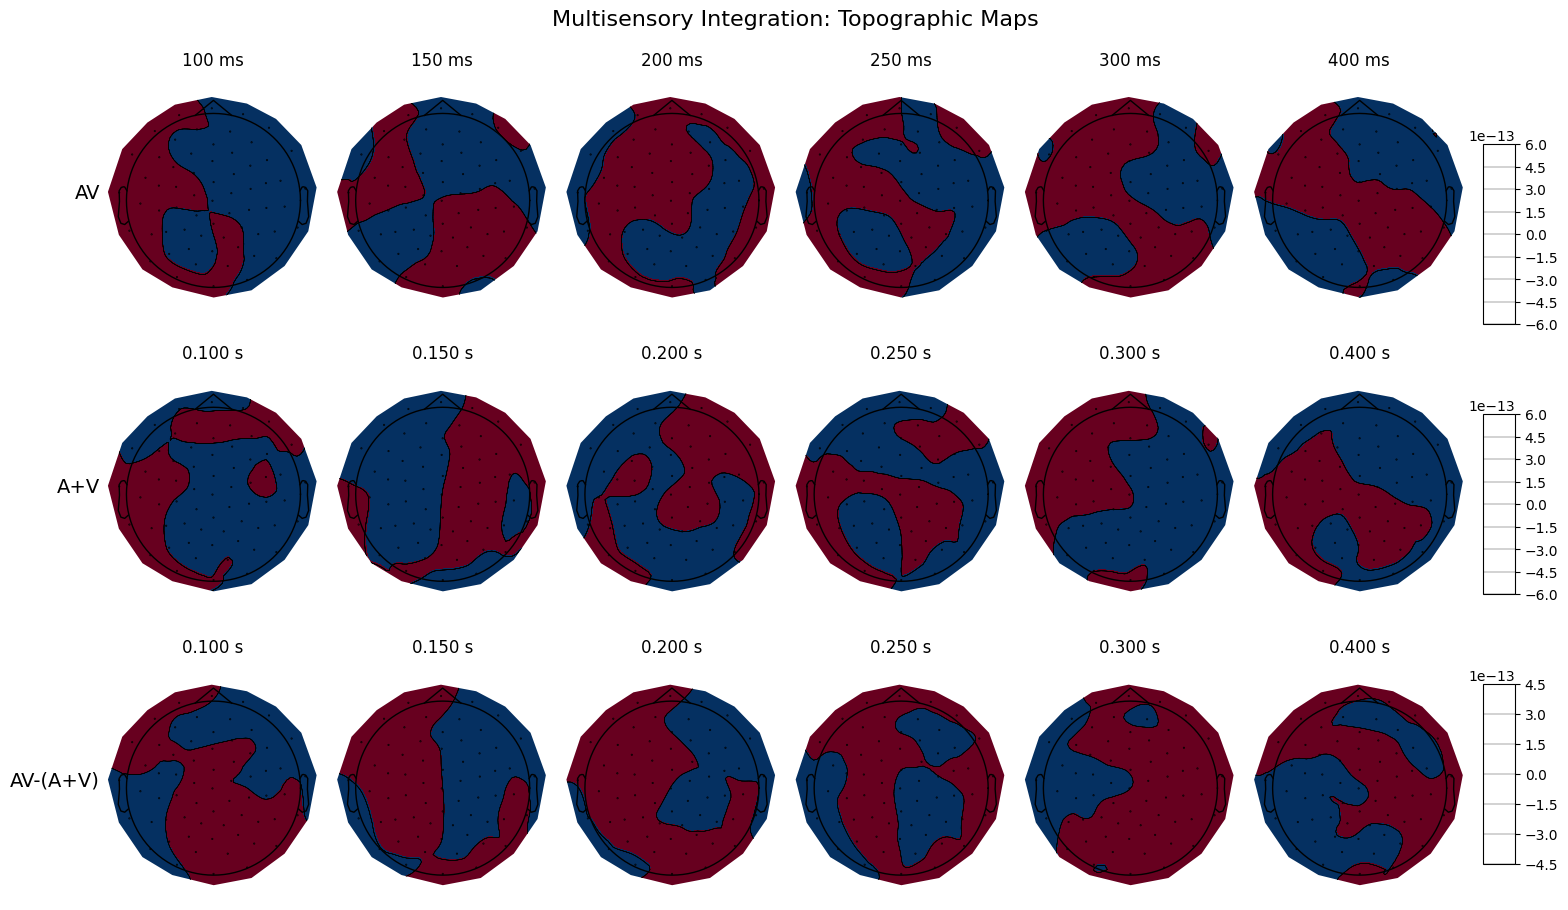

In [ ]:
# topographic maps for each time point (didn't end up being very informative so I didn't include in the report)

# time points of interest (s)
timepoints = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4]

fig, axes = plt.subplots(3, len(timepoints), figsize=(16, 9))

data_audvis = ev_audvis_z.data
data_sum = ev_sum.data
data_diff = ev_diff_integration.data

vmax_response = max(np.abs(data_audvis).max(), np.abs(data_sum).max())
vmax_diff = np.abs(data_diff).max()

for t_idx, timepoint in enumerate(timepoints):
    # AV response
    ev_audvis_z.plot_topomap(timepoint, axes=axes[0, t_idx], 
                           vlim=(-vmax_response, vmax_response),
                           colorbar=False, show=False)
    axes[0, t_idx].set_title(f'{int(timepoint*1000)} ms')
    
    # A+V response
    ev_sum.plot_topomap(timepoint, axes=axes[1, t_idx],
                      vlim=(-vmax_response, vmax_response),
                      colorbar=False, show=False)
    
    # diff. (AV - [A+V])
    ev_diff_integration.plot_topomap(timepoint, axes=axes[2, t_idx],
                                  vlim=(-vmax_diff, vmax_diff),
                                  colorbar=False, show=False)

# row titles
for ax, title in zip(axes[:, 0], ['AV', 'A+V', 'AV-(A+V)']):
    ax.set_ylabel(title, fontsize=14, rotation=0, ha='right', va='center')

plt.tight_layout()
plt.subplots_adjust(right=0.92)
cbar_ax1 = fig.add_axes([0.93, 0.67, 0.02, 0.2])
cbar_ax2 = fig.add_axes([0.93, 0.37, 0.02, 0.2])
cbar_ax3 = fig.add_axes([0.93, 0.07, 0.02, 0.2])

plt.colorbar(axes[0, 0].collections[0], cax=cbar_ax1)
plt.colorbar(axes[1, 0].collections[0], cax=cbar_ax2)
plt.colorbar(axes[2, 0].collections[0], cax=cbar_ax3)

plt.suptitle('Multisensory Integration: Topographic Maps', fontsize=16, y=1.02)
plt.show()

Using a threshold of 1.650851
stat_fun(H1): min=-2.1862844903500385 max=4.125417662234258
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Using a threshold of 1.650851
stat_fun(H1): min=-3.6661889659488405 max=3.834172811049259
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Using a threshold of 1.650851
stat_fun(H1): min=-1.6281973295522634 max=2.63651514320448
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Using a threshold of 1.650851
stat_fun(H1): min=-3.4941903084322505 max=2.71580885788857
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]


==== Multisensory Integration Analysis Results (cluster‐perm) ====
Time Window  Mean Diff       Effect Type     t-value      p-value      Significant    
50-150ms     1.11e-14        Superadditive   4.125        0.030        YES            
150-250ms    5.16e-16        Superadditive   2.893        0.091        NO             
250-350ms    1.84e-14        Superadditive   2.637        0.224        NO             
350-450ms    5.03e-15        Superadditive   2.483        0.205        NO             


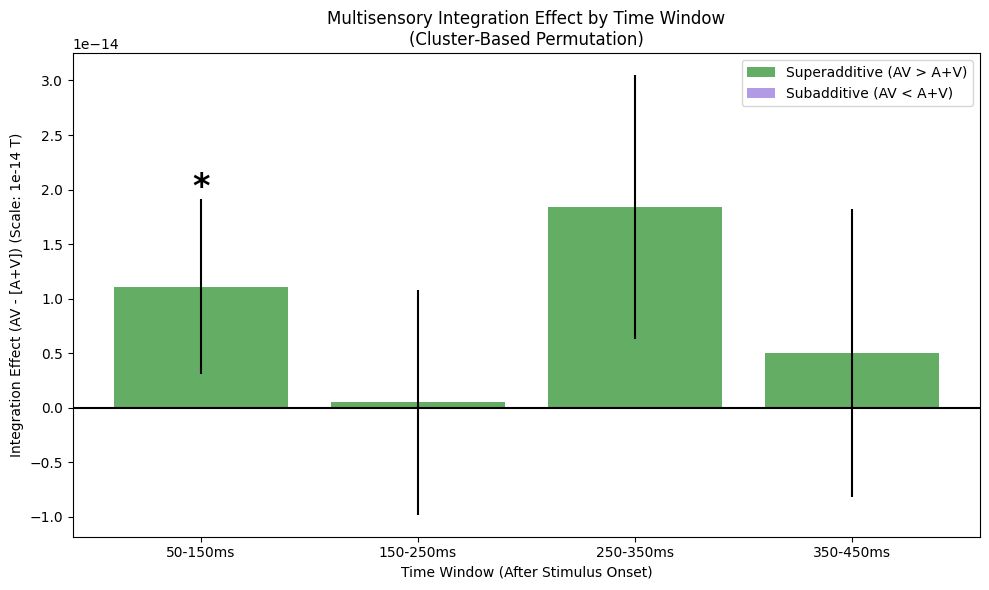

In [ ]:
# cluster-permutation statistical analysis

from mne.stats import permutation_cluster_1samp_test

# single‐trial z‐axis data
epochs_z = epochs.copy().pick(z_channels)

# time windows and labels
time_windows = [(0.05, 0.15), (0.15, 0.25), (0.25, 0.35), (0.35, 0.45)]
time_labels  = ['50-150ms',     '150-250ms',     '250-350ms',     '350-450ms']

def get_window_mean(epochs, cond, tmin, tmax):
    data = epochs[cond].get_data()
    t0, t1 = epochs.time_as_index([tmin, tmax])
    return data[:, :, t0:t1].mean(axis=2)

results_by_window = []

for (tmin, tmax), label in zip(time_windows, time_labels):
    # extract and equalize trials
    A   = get_window_mean(epochs_z, 'aud',    tmin, tmax)
    V   = get_window_mean(epochs_z, 'vis',    tmin, tmax)
    AV  = get_window_mean(epochs_z, 'audvis', tmin, tmax)
    n    = min(A.shape[0], V.shape[0], AV.shape[0])
    A, V, AV = A[:n], V[:n], AV[:n]

    # compute per‐trial difference: shape = (n_trials, n_channels)
    diff_data = AV - (A + V)

    # run cluster‐based permutation test (H1: diff > 0)
    T_obs, clusters, cluster_pv, _ = permutation_cluster_1samp_test(
        diff_data,
        n_permutations=1000,
        threshold=None,   # data‐driven threshold
        tail=1,           # one‐tailed: positive effect
        out_type='mask'   # boolean masks
    )

    # pick the *most* significant cluster
    if len(cluster_pv) > 0:
        best_idx = cluster_pv.argmin()
        p_val    = cluster_pv[best_idx]
        mask     = clusters[best_idx]   # boolean array over channels
        t_val    = T_obs[mask].max()    # peak T in that cluster
        is_sig   = p_val < 0.05
    else:
        p_val    = np.nan
        t_val    = np.nan
        is_sig   = False

    # summary statistics (mean over all trials & channels, sem over trials)
    mean_diff = diff_data.mean()
    sem_diff  = sem(diff_data.mean(axis=1))

    results_by_window.append({
        'time_window':    (tmin, tmax),
        'mean_difference':mean_diff,
        'sem_difference': sem_diff,
        't_statistic':    t_val,
        'p_value':        p_val,
        'significant':    is_sig,
        'effect_type':    'Superadditive' if mean_diff>0
                         else 'Subadditive' if mean_diff<0
                         else 'Additive'
    })

# print exactly the same table, now with cluster‐p’s
print("\n==== Multisensory Integration Analysis Results (cluster‐perm) ====")
print("{:<12} {:<15} {:<15} {:<12} {:<12} {:<15}".format(
    "Time Window","Mean Diff","Effect Type","t-value","p-value","Significant"))
print("="*75)
for r in results_by_window:
    t0, t1 = r['time_window']
    print("{:<12} {:<15.2e} {:<15} {:<12.3f} {:<12.3f} {:<15}".format(
        f"{int(t0*1000)}-{int(t1*1000)}ms",
        r['mean_difference'],
        r['effect_type'],
        r['t_statistic'] or 0.0,
        r['p_value']     or 1.0,
        "YES" if r['significant'] else "NO"
    ))

# same bar plot
plt.figure(figsize=(10, 6))
x      = np.arange(len(time_labels))
means  = [r['mean_difference'] for r in results_by_window]
errors = [r['sem_difference']   for r in results_by_window]
colors = ['forestgreen' if m>0 else 'mediumpurple' for m in means]

plt.bar(x, means, yerr=errors, color=colors, alpha=0.7)
plt.axhline(0, color='k', linestyle='-')
for i,r in enumerate(results_by_window):
    if r['significant']:
        plt.text(i, means[i]+errors[i]+0.01*max(abs(m) for m in means),
                 '*', ha='center', fontweight='bold', fontsize=24)

plt.xlabel('Time Window (After Stimulus Onset)')
plt.ylabel('Integration Effect (AV - [A+V]) (Scale: 1e-14 T)')
plt.title('Multisensory Integration Effect by Time Window\n(Cluster‐Based Permutation)')
plt.xticks(x, time_labels)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='forestgreen', alpha=0.7, label='Superadditive (AV > A+V)'),
    Patch(facecolor='mediumpurple',   alpha=0.7, label='Subadditive (AV < A+V)')
]
plt.legend(handles=legend_elements, loc='best')
plt.tight_layout()
plt.savefig("barplots.png", dpi=400)
plt.show()